<a href="https://colab.research.google.com/github/kngaurav/Exploratory-Data-Analysis/blob/main/E_commerce_Customer-segmentation/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preparation**

## Importing necessary modules and files required to get started on the data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/data.csv',encoding='unicode_escape')
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
tab1 = pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab2 = pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'})
tab3 = pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null values (%)'})

tab_info = pd.concat([tab1 , tab2, tab3])
display(tab_info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,float64,object
null values (nb),0,0,1454,0,0,0,135080,0
null values (%),0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


We see that 25% of the entries in the dataframe are null i.e they are not assigned to any customer. These entries are therefore irrelevant for the current exercise. I therefore drop them from the dataframe: 

In [ ]:
df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)

Now that we have a dataframe filled fully for all variables, I check for duplicate entries and delete them:

In [ ]:
print('Duplicate entries deleted: {}'.format(df.duplicated().sum())) # Optional
df.drop_duplicates(inplace = True)

Duplicate entries deleted: 5225


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df['Description_processed'] = df['Description'].str.replace("[^a-zA-Z0-9]", " ")

<ipython-input-11-33fb8c245c91>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Description_processed'] = df['Description'].str.replace("[^a-zA-Z0-9]", " ")


In [ ]:
df['Description_processed'] = df['Description_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [ ]:
df['Description_processed'] = [descpt.lower() for descpt in df['Description_processed']]

### Let's figure out countries making the most orders and the top products being sold 

---



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from textwrap import wrap


In [ ]:
fig = px.bar(x=df.Country.value_counts().index,y=df.Country.value_counts(),color = df.Country.value_counts(),log_y=True)
fig.update_layout(autosize=False, width=950, height=600, xaxis_title="countries",yaxis_title="counts")
fig.show()

We see that the dataset is largely dominated by orders made from the UK.

In [ ]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

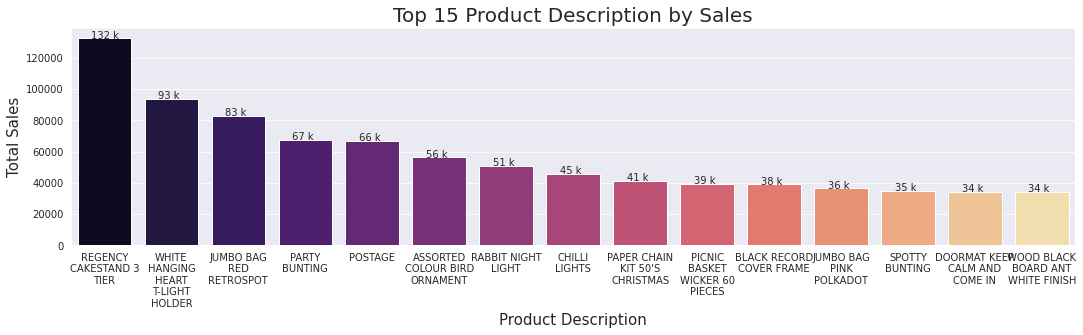

In [ ]:
product_order = df.groupby('Description').sum()['Sales'].nlargest(15)

plt.figure(figsize = (18,4))
ax = sns.barplot(x = product_order.index, y = product_order.values, palette = 'magma')
ax.set_xlabel('Product Description', fontsize = 15)
ax.set_ylabel('Total Sales', fontsize = 15)
ax.set_title('Top 15 Product Description by Sales', fontsize = 20)

labels = [ '\n'.join(wrap(l, 12)) for l in product_order.index ]
ax.set_xticklabels(labels, fontsize = 10)

value_labels = []
for x in product_order.values:
    value_labels.append(str(int(x/1000))+' k')

for p, label in zip(ax.patches, value_labels):
    ax.annotate(label, (p.get_x() + 0.20, p.get_height() + 2), fontsize = 10)

# **Stop Words removal**


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')
add_words = ['felt','spot','colour']
stop_words.extend(add_words)

def remove_stopwords(des):
    description_tokenized = word_tokenize(des)
    des_new = " ".join([i for i in description_tokenized if i not in stop_words])
    return des_new

df['Description_processed'] = [remove_stopwords(r) for r in df['Description_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Lemmatization**

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
lemmatizer = WordNetLemmatizer()
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

df['Description_processed'] = df['Description_processed'].apply(lambda x: lemmatize_sentence(x))

In [ ]:
df['Description_processed']

0            white hang heart light holder
1                      white metal lantern
2            cream cupid heart coat hanger
3         knit union flag hot water bottle
4            red woolly hottie white heart
                        ...               
541904                pack spaceboy napkin
541905              child apron dolly girl
541906        childrens cutlery dolly girl
541907     childrens cutlery circus parade
541908            bake set piece retrospot
Name: Description_processed, Length: 401604, dtype: object

In [ ]:
df1 = df['Description_processed'].drop_duplicates()

In [ ]:
df1 = pd.DataFrame(df1)
display(df1)

,Description_processed
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
503602,set ribbon perfectly pretty
504104,set ribbon party
530382,pink crystal skull phone charm
537621,cream hang heart light holder


# **Plotting freqently occuring words in product list**


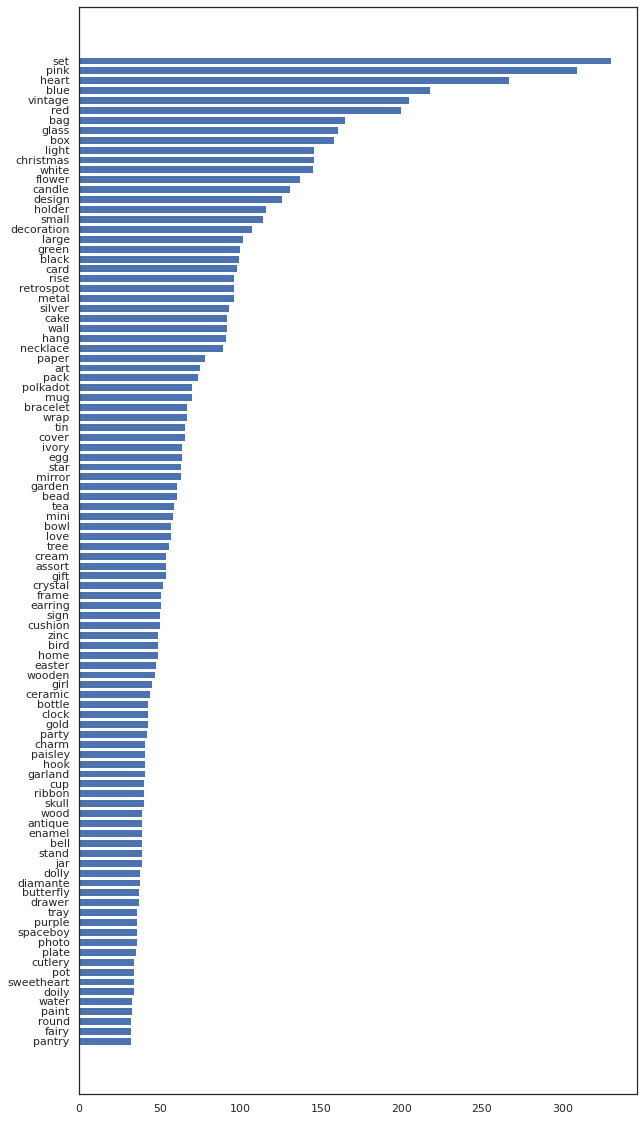

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist

all_words = ' '.join([text for text in df1['Description_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 100 words by frequency
words_df = words_df.nlargest(columns="count", n = 100) 
words_df.sort_values('count', inplace = True)

# Plotting 100 frequent words
plt.figure(figsize=(10,20))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

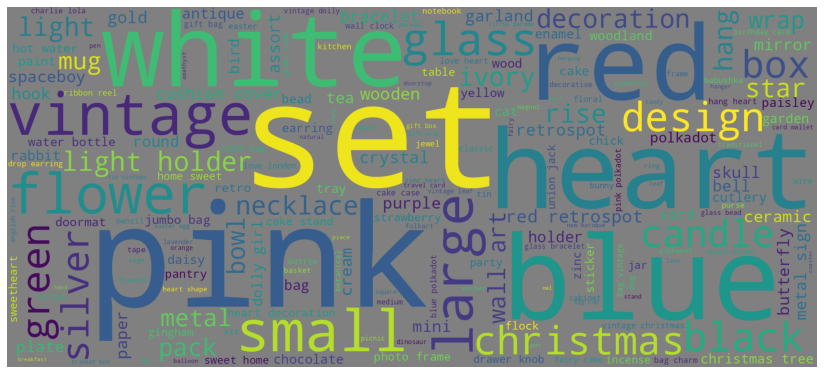

In [ ]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in df1['Description_processed']])
 
wordcloud = WordCloud(width = 1800, height = 800, 
                      background_color ='grey', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (13,5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# **Bag of words model**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 1: Design the Vocabulary
count_vectorizer = CountVectorizer(binary = True) 

# Step 2: Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(df1['Description_processed']) 

# Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
df_binary = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
df_binary

,120cm,125g,15c,15cm,16x16cm,17080,18pc,200,20light,250g,...,world,woven,wrap,wreath,wreck,write,xmas,yellow,yuletide,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X1 = bag_of_words.toarray()
X1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Importing some more modules for further analysis...

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')

from warnings import filterwarnings
filterwarnings('ignore')

# **Applying k-means model**


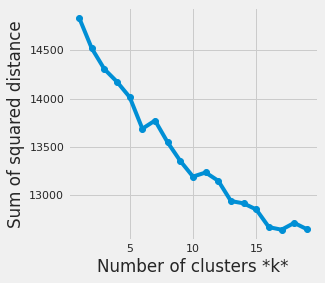

In [ ]:
from sklearn.cluster import KMeans

list_k = list(range(1, 20))
inertias = []
for k in list_k:
    km = KMeans(n_clusters = k)
    km.fit(X1)
    inertias.append(km.inertia_)

# Plotting
plt.figure(figsize=(4, 4))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
# finding the optimum number of components:
components = None
pca = PCA(n_components = components)  # components - hyperparameter
pca.fit(X1)

PCA()

In [ ]:
# printing the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)

Variances (Percentage):
[2.24205401e+00 1.95397686e+00 1.88445757e+00 ... 8.83391316e-34
 7.62727184e-34 6.36777249e-34]


In [ ]:
# printing the cumulative variances
print("Cumulative Variances (Percentage):")
print((pca.explained_variance_ratio_.cumsum() * 100))

Cumulative Variances (Percentage):
[  2.24205401   4.19603087   6.08048843 ... 100.         100.
 100.        ]


Text(0, 0.5, 'Explained variance (%)')

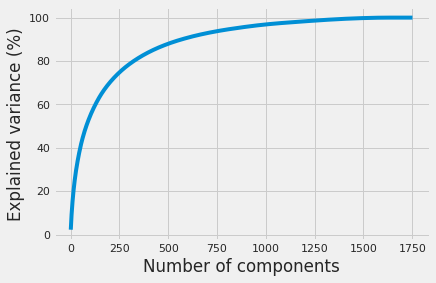

In [ ]:
# Scree plot
import numpy as np
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))

plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")



From above plot, we see it takes 1250 components to reach around 100% variance. So, 85% variance should be sufficient for modelling.


Number of components: 422


Text(0, 0.5, 'Explained variance (%)')

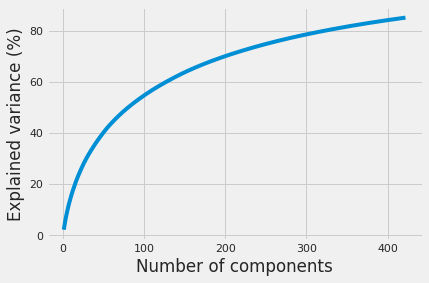

In [ ]:
# choosing only 85% of variations:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.85)
pca.fit(X1)

# optimum no:of components
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")



Above plot shows that optimal components for the variation of 85% are 422!


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(422)
PCA_data = pca.fit_transform(X1)
PCA_data.shape 

(3766, 422)

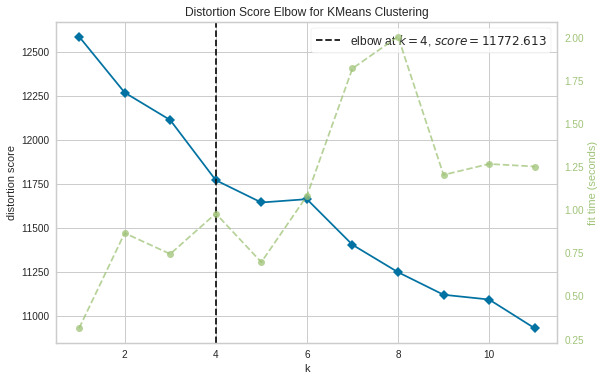

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow plot
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,12)).fit(PCA_data)
visualizer.show()


Optimal K- value occurs at k = 4 i.e. Hence, 4 clusters are required


In [ ]:
km = KMeans(n_clusters=4,init="k-means++",random_state=42) # applying k = 4
km.fit(PCA_data)                 # fit the data

centroids = km.cluster_centers_  # centroid points
print("centroids: \n",centroids)

print("\ninertia: ",km.inertia_)  # measures how tight my groups are

centroids: 
 [[-2.25445125e-01 -9.71025045e-02  7.81194487e-01 ...  5.60310748e-04
  -4.85883597e-04 -1.85514962e-03]
 [ 8.45015880e-01  3.55038581e-01  1.60104853e-01 ... -1.38973586e-04
   6.09419018e-06 -3.24879018e-05]
 [-2.64842002e-02 -1.14017103e-01 -8.16237305e-02 ... -4.82359331e-05
   5.85624677e-05  1.72449616e-04]
 [-4.64079736e-01  7.94714640e-01 -1.26862346e-01 ...  8.94332056e-05
  -1.12215251e-04  1.23798730e-04]]

inertia:  11772.61326818342


In [ ]:
km.labels_   # shows which group each datapoint belongs to

array([0, 2, 0, ..., 3, 0, 2], dtype=int32)

In [ ]:
#predict the labels of clusters
label = km.fit_predict(PCA_data)  
print(label)

[0 2 0 ... 3 0 2]


# **Visualizing the Clusters**


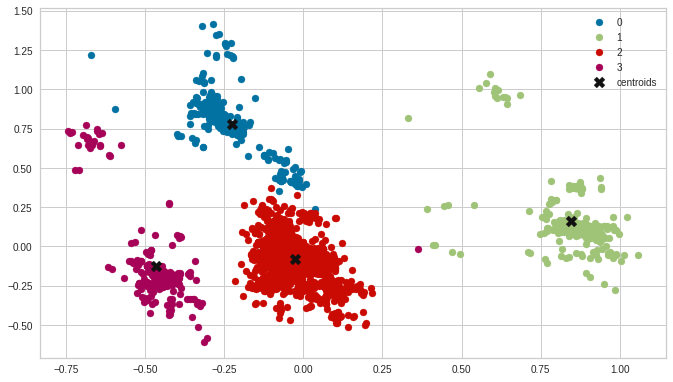

In [ ]:
centroids = km.cluster_centers_   # Getting the Centroids
u_labels = np.unique(label)      # Getting the labels
 
# plotting the results:
plt.figure(figsize=(10, 6)) 
for i in u_labels:
    plt.scatter(PCA_data[label == i , 0] , PCA_data[label == i , 2] , label = i)
plt.scatter(centroids[:,0] , centroids[:,2] , marker="X", c="k", s=120, label="centroids")
plt.legend()
plt.show()

3D Plot :

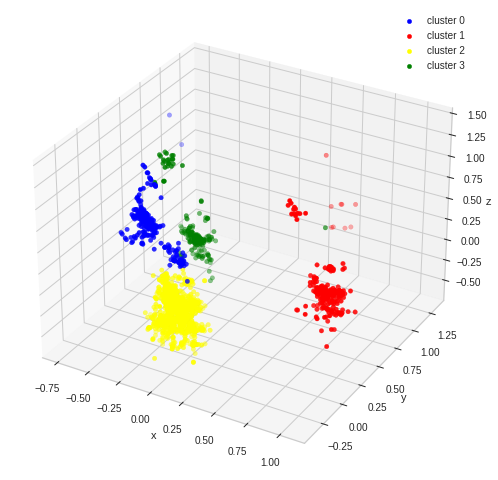

In [ ]:
labels = np.unique(label)  # Getting the labels

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(PCA_data[label == 0,0],PCA_data[label == 0,1],PCA_data[label == 0,2], s = 20 , color = 'blue', label = "cluster 0")  
ax.scatter(PCA_data[label == 1,0],PCA_data[label == 1,1],PCA_data[label == 1,2], s = 20 , color = 'red', label = "cluster 1")  
ax.scatter(PCA_data[label == 2,0],PCA_data[label == 2,1],PCA_data[label == 2,2], s = 20 , color = 'yellow', label = "cluster 2")  
ax.scatter(PCA_data[label == 3,0],PCA_data[label == 3,1],PCA_data[label == 3,2], s = 20 , color = 'green', label = "cluster 3") 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.legend()
plt.show()

In [ ]:
# creating a dataframe for the cluster labels:
df_cluster = pd.DataFrame(km.labels_)
print(df_cluster.shape)
df_cluster

(3766, 1)


,0
0,0
1,2
2,0
3,2
4,0
...,...
3761,1
3762,1
3763,3
3764,0


In [ ]:
print(df1.shape)
df1

(3766, 1)


,Description_processed
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
503602,set ribbon perfectly pretty
504104,set ribbon party
530382,pink crystal skull phone charm
537621,cream hang heart light holder




From above two DataFrames, Shape is same for df1 and df_cluster but index are different so, need to make index same to merge two DataFrames


In [ ]:
df1 = df1.reset_index(drop=True)

df2 = df1.join(df_cluster)

df2.rename(columns={0:'Product Cluster'},inplace=True)

In [ ]:
# merging the "product clusters" with the original dataframe:
df3 = pd.merge(df, df2, how='left', on = 'Description_processed')
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_processed,Sales,Product Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,white hang heart light holder,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,white metal lantern,20.34,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,cream cupid heart coat hanger,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,knit union flag hot water bottle,20.34,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,red woolly hottie white heart,20.34,0
...,...,...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,pack spaceboy napkin,10.20,2
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,child apron dolly girl,12.60,2
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,childrens cutlery dolly girl,16.60,2
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,childrens cutlery circus parade,16.60,2


## *One-hot Encoding " Product Cluster "*

In [ ]:
df4 = pd.get_dummies(df3,columns=["Product Cluster"])
df4.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_processed,Sales,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,white hang heart light holder,15.30,1,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,white metal lantern,20.34,0,0,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,cream cupid heart coat hanger,22.00,1,0,0,0


In [ ]:
# copying the dataframe into another variable:
df5 = df4.copy()

In [ ]:
# Dropping unnecessary features:
df5 = df5.drop(["Description","InvoiceDate","Description_processed"],axis=1)
df5.head(5)

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Sales,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3
0,536365,85123A,6,2.55,17850.0,United Kingdom,15.30,1,0,0,0
1,536365,71053,6,3.39,17850.0,United Kingdom,20.34,0,0,1,0
2,536365,84406B,8,2.75,17850.0,United Kingdom,22.00,1,0,0,0
3,536365,84029G,6,3.39,17850.0,United Kingdom,20.34,0,0,1,0
4,536365,84029E,6,3.39,17850.0,United Kingdom,20.34,1,0,0,0


## *One-hot Encoding "Country" Feature*


In [ ]:
df6 = pd.get_dummies(df5,columns=["Country"])
df6.head(5)

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Sales,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,536365,85123A,6,2.55,17850.0,15.30,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,536365,71053,6,3.39,17850.0,20.34,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,536365,84406B,8,2.75,17850.0,22.00,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,536365,84029G,6,3.39,17850.0,20.34,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,536365,84029E,6,3.39,17850.0,20.34,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## *Label Encoding "CustomerID" Feature*

In [ ]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder() # label_encoder object knows how to understand word labels.
 
df6['CustomerID']= label_encoder.fit_transform(df6['CustomerID'])
df6.head(5)

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Sales,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,536365,85123A,6,2.55,4048,15.30,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,536365,71053,6,3.39,4048,20.34,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,536365,84406B,8,2.75,4048,22.00,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,536365,84029G,6,3.39,4048,20.34,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,536365,84029E,6,3.39,4048,20.34,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df6.shape

(401604, 47)

## **Grouping the Costomers based on CustomerID**

In [ ]:
df7 = df6.groupby(['CustomerID']).mean()
df7

,Quantity,UnitPrice,Sales,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,Country_Australia,Country_Austria,Country_Bahrain,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
CustomerID,,,,,,,,,,,,,,,,,,,,,
0,0.000000,1.040000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,13.505495,2.644011,23.681319,0.060440,0.153846,0.714286,0.071429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,75.516129,5.764839,57.975484,0.064516,0.096774,0.774194,0.064516,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.643836,8.289041,24.076027,0.095890,0.232877,0.643836,0.027397,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.588235,3.841176,19.670588,0.000000,0.000000,0.941176,0.058824,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,4.500000,4.765000,18.060000,0.000000,0.100000,0.900000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4368,7.714286,5.622857,11.545714,0.000000,0.285714,0.714286,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4369,7.538462,4.821538,13.584615,0.000000,0.076923,0.846154,0.076923,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df7.describe()

,Quantity,UnitPrice,Sales,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,Country_Australia,Country_Austria,Country_Bahrain,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,...,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,22.403123,7.982549,28.868389,0.094413,0.114391,0.745690,0.045506,0.001901,0.002119,0.000457,...,0.000229,0.000229,0.000229,0.006782,0.001830,0.004670,0.000915,0.000457,0.903477,0.000915
std,213.256361,144.965562,127.324719,0.119971,0.106599,0.146689,0.061119,0.042441,0.045451,0.021386,...,0.015124,0.015124,0.015124,0.081589,0.042742,0.067696,0.030237,0.021386,0.295341,0.030237
min,-144.000000,0.000000,-4287.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.491504,2.225481,11.066618,0.000000,0.040000,0.673342,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,9.500000,2.947169,16.941019,0.059701,0.100000,0.750000,0.030928,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,14.033772,3.898948,23.581429,0.132397,0.162791,0.833333,0.066667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,12540.000000,8055.780000,3861.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y = df7.to_numpy()

# **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
y_scaled = sc.fit_transform(y)

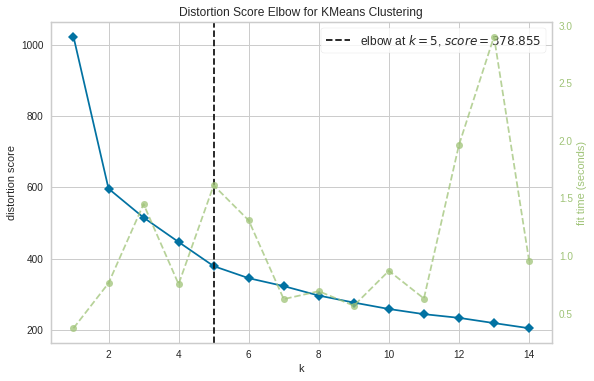

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=9)
visualizer = KElbowVisualizer(model, k=(1,15)).fit(y_scaled)
visualizer.show()



The optimal value of k occurs at k = 5



In [ ]:
km = KMeans(n_clusters = 5, init= "k-means++", random_state = 10)     # applying k = 4
km.fit(y_scaled)          # fit the data - identify pattern, does everything

centroids = km.cluster_centers_   # final centroid points

# print("centroids: ",centroids)
print("inertia: ",km.inertia_)    # measures how tight my groups are. Lower the better

inertia:  378.8517228486437


In [ ]:
km.labels_ 

array([0, 4, 4, ..., 0, 0, 3], dtype=int32)

In [ ]:
# predict the labels of clusters
label = km.fit_predict(y_scaled)  
print(label)

[0 4 4 ... 0 0 3]


## *Visualizing the Customer Cluster*:


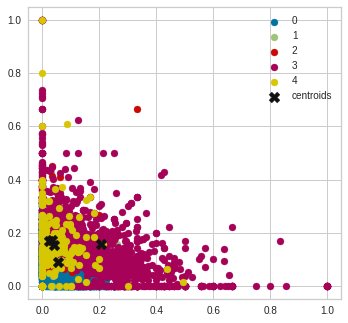

In [ ]:
# Getting the Centroids and Cluster labels
centroids = km.cluster_centers_
labels = np.unique(label)

# 2D plotting
plt.figure(figsize=(5, 5)) 
for i in labels:
    plt.scatter(y_scaled[label == i , 3] , y_scaled[label == i , 4] , label = i)
plt.scatter(centroids[:,3] , centroids[:,4] , marker="X", c="k", s=120, label="centroids")
plt.legend()
plt.show()

3D plot : 

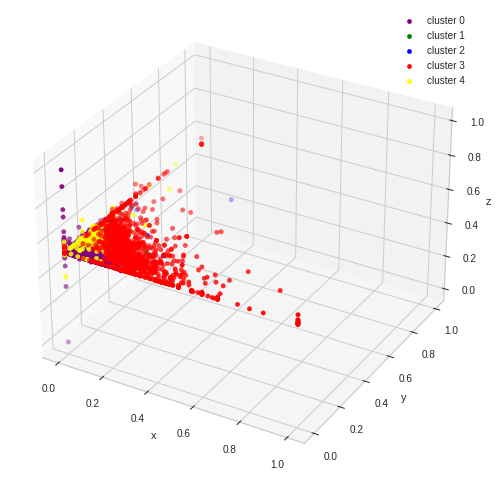

In [ ]:
labels = np.unique(label)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(y_scaled[label == 0,3],y_scaled[label == 0,4],y_scaled[label == 0,2], s = 20 , color = 'purple', label = "cluster 0")  
ax.scatter(y_scaled[label == 1,3],y_scaled[label == 1,4],y_scaled[label == 1,2], s = 20 , color = 'green', label = "cluster 1")  
ax.scatter(y_scaled[label == 2,3],y_scaled[label == 2,4],y_scaled[label == 2,2], s = 20 , color = 'blue', label = "cluster 2")  
ax.scatter(y_scaled[label == 3,3],y_scaled[label == 3,4],y_scaled[label == 3,2], s = 20 , color = 'red', label = "cluster 3")  
ax.scatter(y_scaled[label == 4,3],y_scaled[label == 4,4],y_scaled[label == 4,2], s = 20 , color = 'yellow', label = "cluster 4")  

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()



Since the datapoints are closer to each other in the plot, there is no clear cluster formed.


In [ ]:
df8 = pd.DataFrame(label) # creating a dataframe for the "customer clusters"

df8.reset_index(level=0, inplace=True) # creating the "customerID" column

df8.rename(columns={'index':'CustomerID', 0:'Customer cluster'},inplace=True) # renaming the columns

df8.head()

,CustomerID,Customer cluster
0,0,0
1,1,4
2,2,4
3,3,4
4,4,4


In [ ]:
# count of each clusters
df9 = df8.groupby("Customer cluster").count()
df9

,CustomerID
Customer cluster,
0,2747
1,87
2,95
3,1203
4,240


## **Plotting Customer Clusters**:


<AxesSubplot:xlabel='Customer cluster', ylabel='count'>

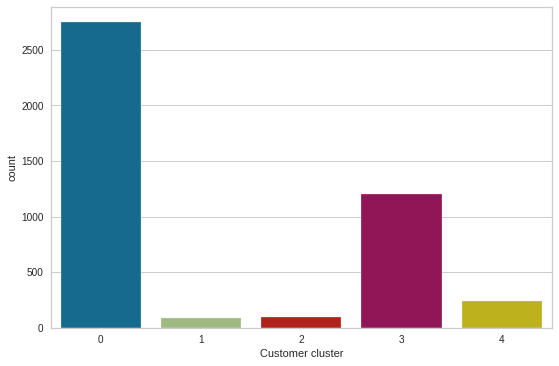

In [ ]:
# check the number of clusters and number of CUSTOMERS in each cluster
import seaborn as sns
sns.countplot(df8["Customer cluster"])



1. Cluster-0 contains the maximum number of Customers, followed by cluster-3
   
2. Cluster-1,2 and 4 contains the least number of Customers. 





**Silhouette score:**
    
*   If the score is 1, the cluster is dense and well-separated from other clusters.

*   A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring cluster


*   Let's look for a silhouette score closer to 1. This score varies from -1 to 1







In [ ]:
from sklearn import metrics
score = metrics.silhouette_score(y_scaled, km.labels_ )
score

0.3812894090192131

# **Interpretation of Silhouette score:**

*   Score of 0.38 shows that the clusters are not well seprated from each other, and it overlaps each other slightly.
*   Overall, it is a good score



# **Conclusion**

Thus we have grouped Similar Customers based on:

    Products they bought
    Quantity and Price of the purchase
    Country of origin of the customers

We have found that the customers can be segmented into 5 buckets, based on their similarity.